In [3]:
def genOut(grazesim):
    x = list(grazesim.simulation[1].coralNodeCount.keys())

    multsimCoralCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].coralNodeCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()

    multsimNeighborCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].coralNeighborCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()

    C = multsimCoralCounts
    N = multsimNeighborCounts
    CN = np.divide(N, C, out=np.zeros_like(N), where=C!=0)
    CNr = np.divide(CN, C, out=np.zeros_like(N), where=C!=0)

    multsimMacroCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].macroNodeCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()

    multsimNeighborCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].macroNeighborCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()
    M = multsimMacroCounts
    mN = multsimNeighborCounts
    MN = np.divide(mN, M, out=np.zeros_like(mN), where=M!=0)
    MNr = np.divide(MN, M, out=np.zeros_like(mN), where=M!=0)


    multsimTurfCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].turfNodeCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()

    multsimNeighborCounts = np.array([tl.dictToNumpy(grazesim.simulation[i].turfNeighborCount) 
                                   for i,val in enumerate(grazesim.simulation)]).transpose()
    T = multsimTurfCounts
    tN = multsimNeighborCounts
    TN = np.divide(tN, T, out=np.zeros_like(tN), where=T!=0)
    TNr = np.divide(TN, T, out=np.zeros_like(tN), where=T!=0)
    
    return(C,CN,CNr,T,TN,TNr,M,MN,MNr)


def CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s):
    plt.figure(figsize=(20, 15))

    plt.subplot(321)

    plt.title("Subset Coral Count")
    plt.plot(x[ti:tf],C[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],C[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(322)

    plt.title("Subset Coral-Coral Neighbor Average")
    plt.plot(x[ti:tf],CN[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],CN[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(323)

    plt.title("Subset Turf Count")
    plt.plot(x[ti:tf],T[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],T[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(324)

    plt.title("Subset Turf-Turf Neighbor Average")
    plt.plot(x[ti:tf],TN[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],TN[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(325)

    plt.title("Subset Macroalgae Count")
    plt.plot(x[ti:tf],M[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],M[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(326)

    plt.title("Subset Macroalgae-Macroalgae Neighbor Average")
    plt.plot(x[ti:tf],MN[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],MN[ti:tf,:].mean(axis=1), 'black')
    
def RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s):

    plt.figure(figsize=(20, 15))

    plt.subplot(321)

    plt.title("Subset Coral Count")
    plt.plot(x[ti:tf],C[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],C[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(322)

    plt.title("Subset CNr index")
    plt.plot(x[ti:tf],CNr[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],CNr[ti:tf,:].mean(axis=1), 'black')


    plt.subplot(323)

    plt.title("Subset Turf Count")
    plt.plot(x[ti:tf],T[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],T[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(324)

    plt.title("Subset TNr")
    plt.plot(x[ti:tf],TNr[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],TNr[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(325)

    plt.title("Subset Macroalgae Count")
    plt.plot(x[ti:tf],M[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],M[ti:tf,:].mean(axis=1), 'black')

    plt.subplot(326)

    plt.title("Subset MNr")
    plt.plot(x[ti:tf],MNr[ti:tf,s], alpha=0.4)
    plt.plot(x[ti:tf],MNr[ti:tf,:].mean(axis=1), 'black')

In [4]:
from coralModelTrackingAlgae import Ocean, Reef, Organism
import tools as tl
import numpy as np


import pickle
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as clt

from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import ndimage



In [5]:
## Time and Grid Settings
NumberOfSimulations = 200
tf, dt= 400, .1 
NumberOfTimesteps = int(tf/dt)

rows, columns = 10, 10
NumberOfNodes = rows * columns
center = (round(rows/2),round(columns/2))

In [7]:
## Parameters
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 #.2
a=.2
y=.75 #.9

In [8]:
## Intial Grid Configuration
distanceGrid = np.array([Reef.distance([i+.5,j+.5], center) 
                 for i in range(0,rows) 
                 for j in range(0,columns)]).reshape(rows,columns)
maxCoralDist = np.concatenate(distanceGrid, axis=None)    # make into list of distance to center, next sort
maxCoralDist = np.sort(maxCoralDist)[int(coralPercent*100)]  ## <---- 33 here indicates the distance within with the 33 closest points are
coralNodeLocations = (np.where(distanceGrid < maxCoralDist))
coralNodeLocations = [(coralNodeLocations[0][n],coralNodeLocations[1][n]) 
                      for n in range(0,len(coralNodeLocations[0]))]

<center> <h1> GRAZING = .4 </h1> </center>

In [13]:
## Parameters
g=.4
types4 = np.zeros((NumberOfTimesteps, NumberOfNodes, NumberOfSimulations)) ## make sure not to overwrite

In [14]:
%%time
Grazing4 = Ocean()

for s in range(0,NumberOfSimulations):
    medlowGrazing = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            node = Organism(type=U, location=[i,j], ID=count)
            medlowGrazing.append(node)
            count = count + 1            
    medlowGrazing.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        
        for i,val in enumerate(medlowGrazing.nodes):
            types4[n,i,s] = medlowGrazing.nodes[i].type
        medlowGrazing.roll(r=r, d=d, a=a, g=g, y=y, dt=dt) 
        
    Grazing4.append(medlowGrazing)

CPU times: user 9min 51s, sys: 2.15 s, total: 9min 54s
Wall time: 9min 56s


In [15]:
x = list(Grazing4.simulation[1].coralNodeCount.keys())
C,CN,CNr,T,TN,TNr,M,MN,MNr = genOut(grazesim=Grazing4)
s=np.random.randint(low=0, high=200, size=(15,))

In [16]:
ti, tf = 0, 2000

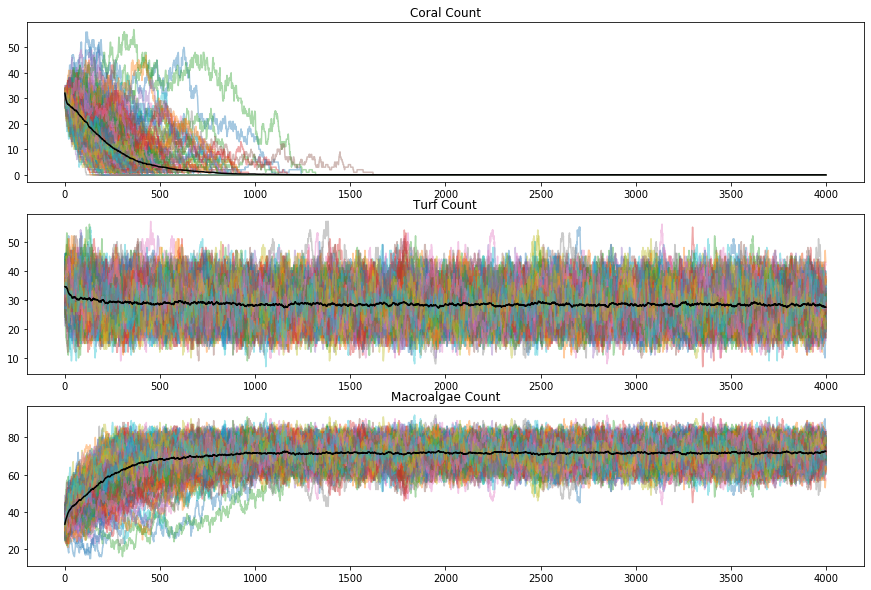

In [17]:
plt.figure(figsize=(15, 10))

plt.title("Output")

plt.subplot(311)

plt.title("Coral Count")
plt.plot(x,C, alpha=0.4)
plt.plot(x,C.mean(axis=1), 'black')

plt.subplot(312)

plt.title("Turf Count")
plt.plot(x,T, alpha=0.4)
plt.plot(x,T.mean(axis=1), 'black')

plt.subplot(313)

plt.title("Macroalgae Count")
plt.plot(x,M, alpha=0.4)
plt.plot(x,M.mean(axis=1), 'black')


<center> <h1> Count And Neighbor Average Plots - Coral, Turf, and Macroalgae </h1> </center>

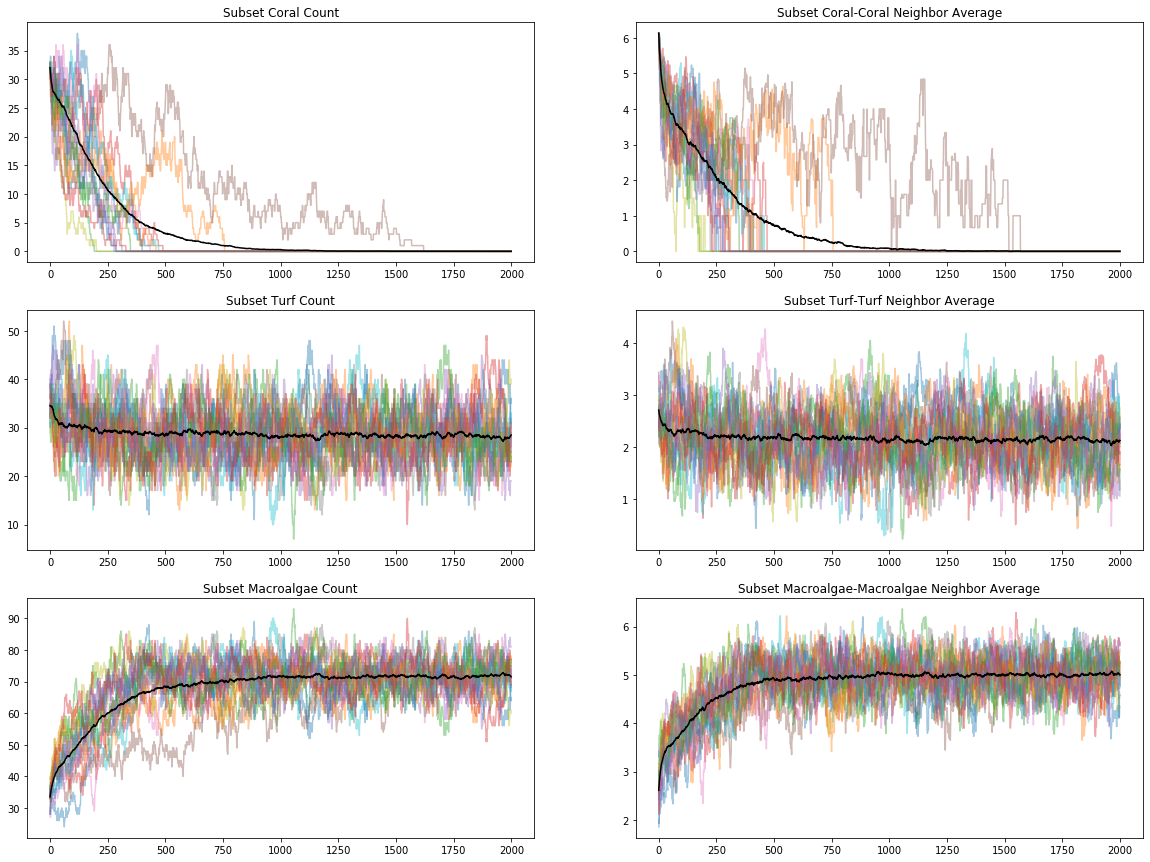

In [18]:
CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s)

<center> <h1> Count And CNr Plots - Coral, Turf, and Macroalgae </h1> </center>

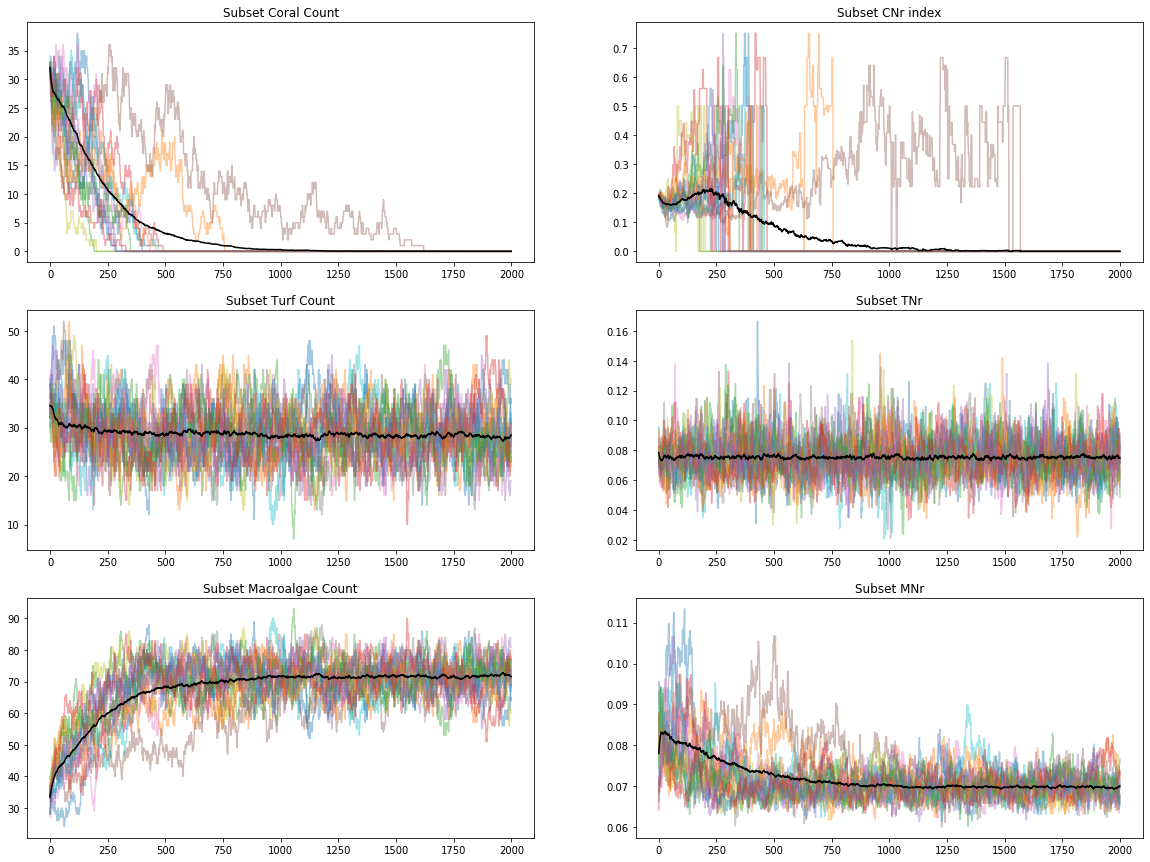

In [19]:
RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s)

<center> <h1> GRAZING = .5 </h1> </center>

In [20]:
## Parameters
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 #.2
a=.2
y=.75 #.9

g=.5
types5 = np.zeros((NumberOfTimesteps, NumberOfNodes, NumberOfSimulations)) ## make sure not to overwrite

In [21]:
%%time

Grazing5 = Ocean()

for s in range(0,NumberOfSimulations):
    medGrazing = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            node = Organism(type=U, location=[i,j], ID=count)
            medGrazing.append(node)
            count = count + 1            
    medGrazing.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        
        for i,val in enumerate(medGrazing.nodes):
            types5[n,i,s] = medGrazing.nodes[i].type
        medGrazing.roll(r=r, d=d, a=a, g=g, y=y, dt=dt) 
        
    Grazing5.append(medGrazing)

CPU times: user 9min 18s, sys: 667 ms, total: 9min 19s
Wall time: 9min 19s


In [22]:
C,CN,CNr,T,TN,TNr,M,MN,MNr = genOut(grazesim=Grazing5)

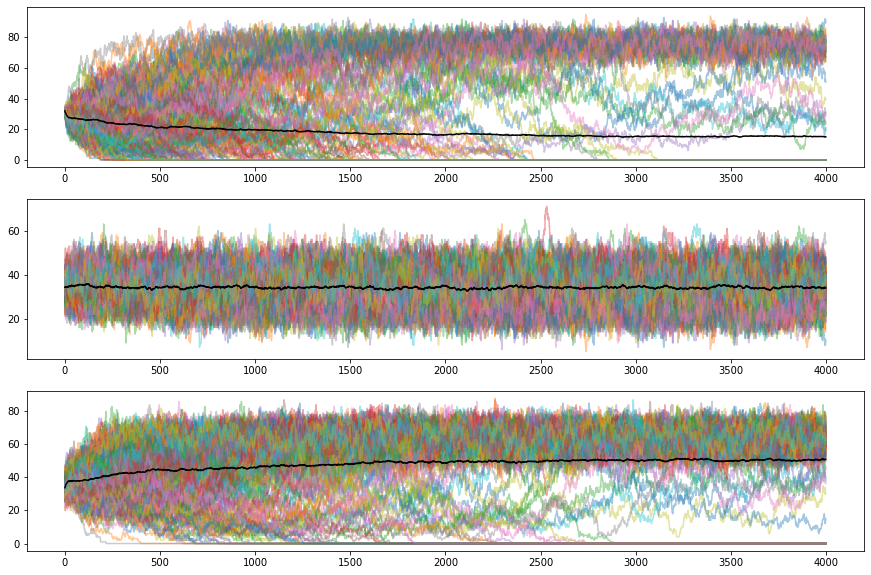

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(x,C, alpha=0.4)
plt.plot(x,C.mean(axis=1), 'black')
plt.subplot(312)
plt.plot(x,T, alpha=0.4)
plt.plot(x,T.mean(axis=1), 'black')
plt.subplot(313)
plt.plot(x,M, alpha=0.4)
plt.plot(x,M.mean(axis=1), 'black')

<center> <h1> Count And Neighbor Average Plots - Coral, Turf, and Macroalgae </h1> </center>

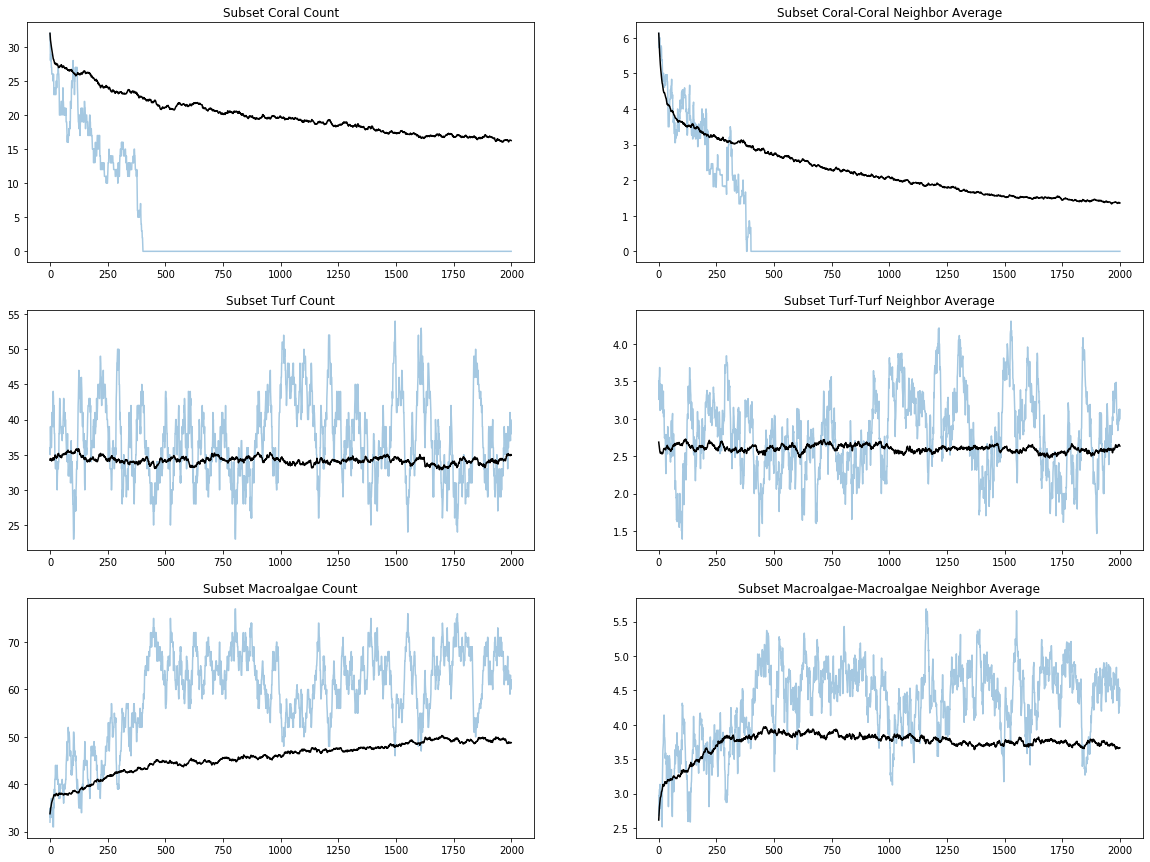

In [24]:
CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s)

<center> <h1> Count And CNr Plots - Coral, Turf, and Macroalgae </h1> </center>

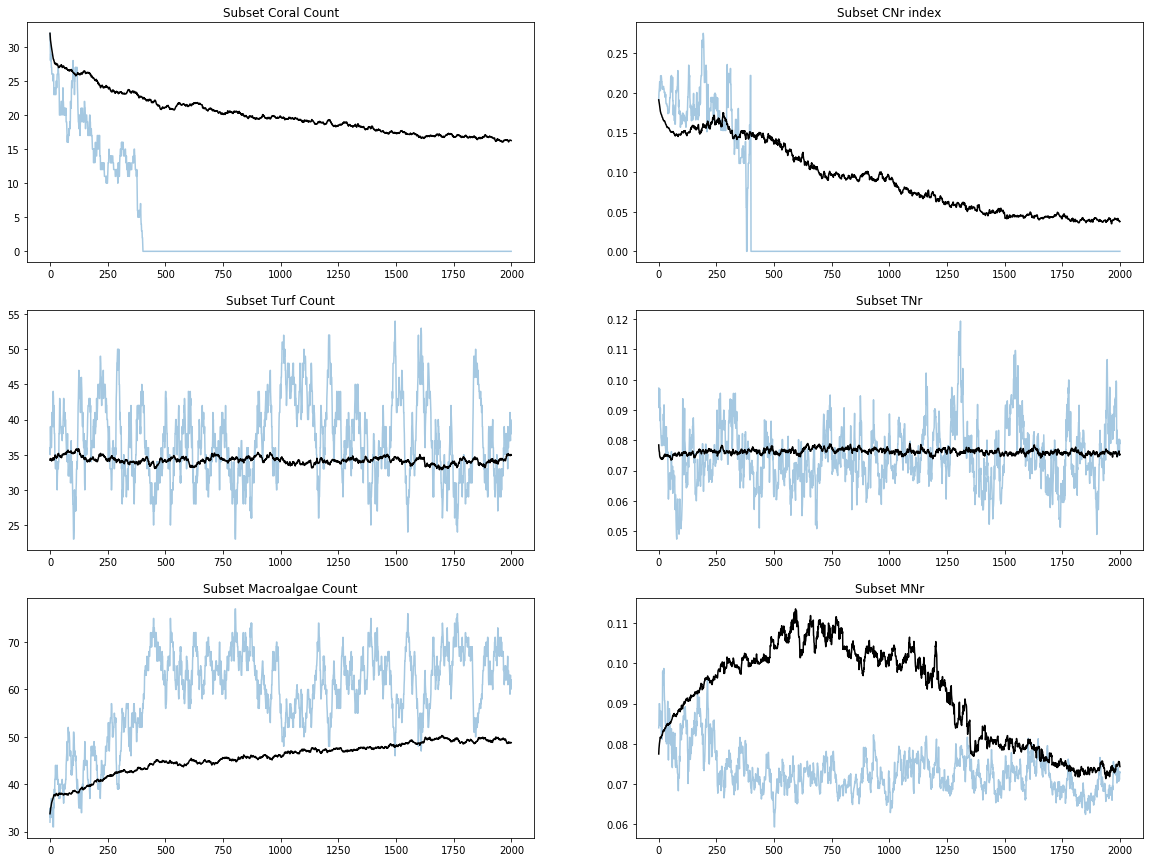

In [25]:
RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s)

<center> <h1> GRAZING = .6 </h1> </center>

In [26]:
## Parameters
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 #.2
a=.2
y=.75 #.9

g=.6
types6 = np.zeros((NumberOfTimesteps, NumberOfNodes, NumberOfSimulations)) ## make sure not to overwrite

In [27]:
%%time

Grazing6 = Ocean()

for s in range(0,NumberOfSimulations):
    medHighGrazing = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            node = Organism(type=U, location=[i,j], ID=count)
            medHighGrazing.append(node)
            count = count + 1            
    medHighGrazing.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        
        for i,val in enumerate(medHighGrazing.nodes):
            types6[n,i,s] = medHighGrazing.nodes[i].type
        medHighGrazing.roll(r=r, d=d, a=a, g=g, y=y, dt=dt) 
        
    Grazing6.append(medHighGrazing)

CPU times: user 10min 28s, sys: 2.52 s, total: 10min 31s
Wall time: 10min 34s


In [28]:
s=np.random.randint(low=0, high=200, size=(15,))
C,CN,CNr,T,TN,TNr,M,MN,MNr = genOut(grazesim=Grazing6)

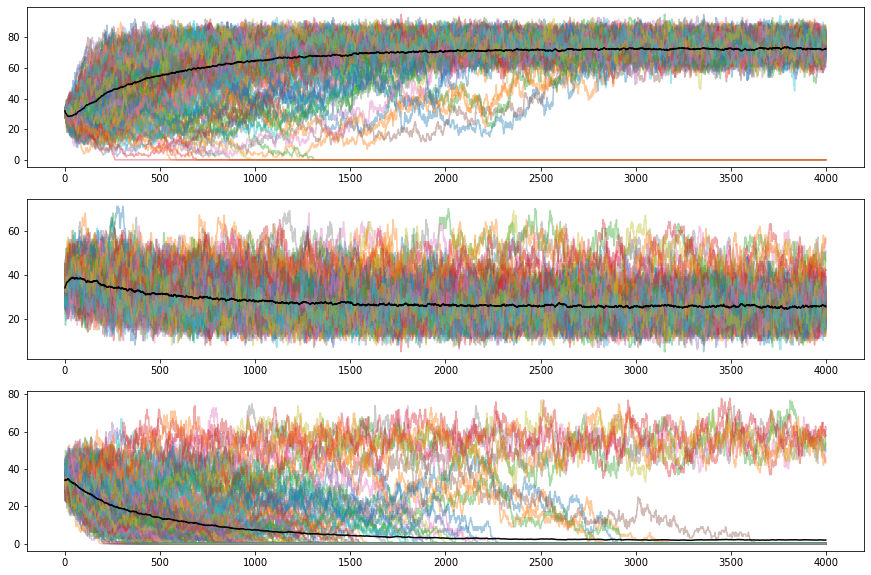

In [29]:
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(x,C, alpha=0.4)
plt.plot(x,C.mean(axis=1), 'black')
plt.subplot(312)
plt.plot(x,T, alpha=0.4)
plt.plot(x,T.mean(axis=1), 'black')
plt.subplot(313)
plt.plot(x,M, alpha=0.4)
plt.plot(x,M.mean(axis=1), 'black')

<center> <h1> Count And Neighbor Average Plots - Coral, Turf, and Macroalgae </h1> </center>

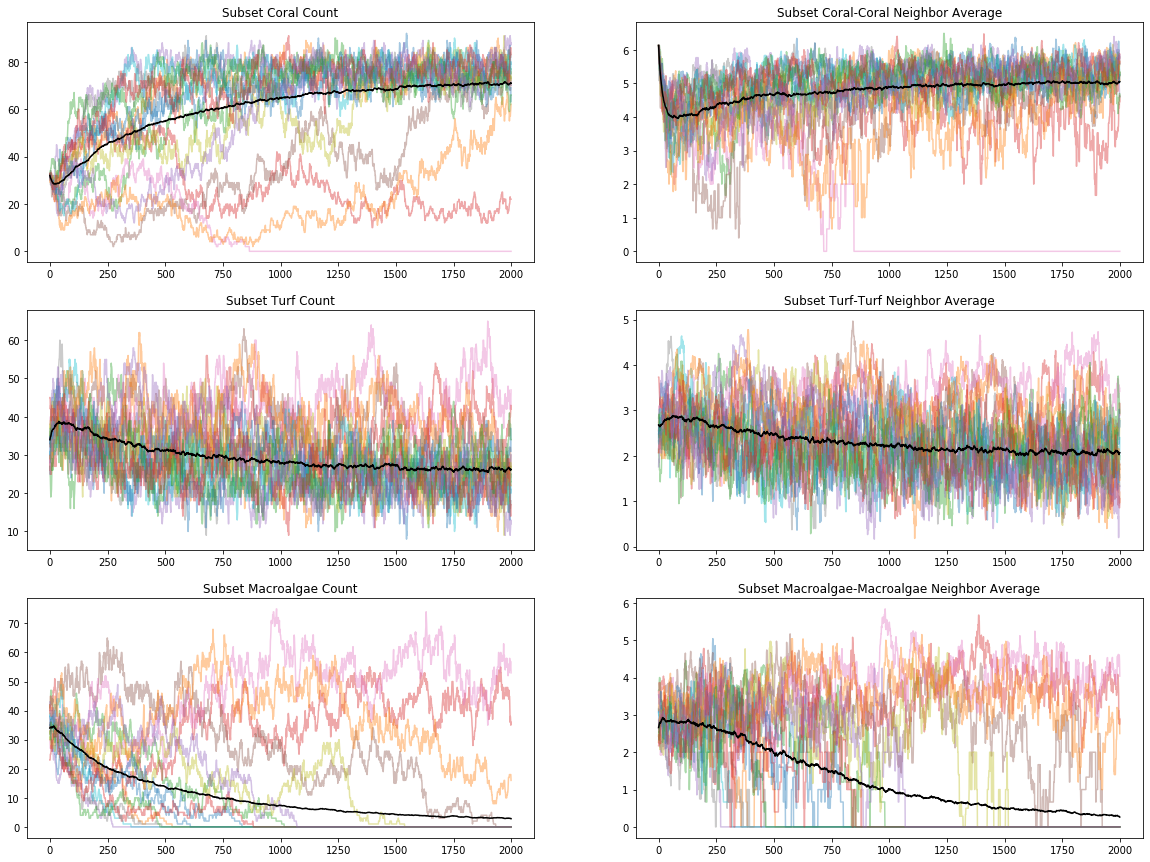

In [30]:
CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s)

<center> <h1> Count And CNr Plots - Coral, Turf, and Macroalgae </h1> </center>

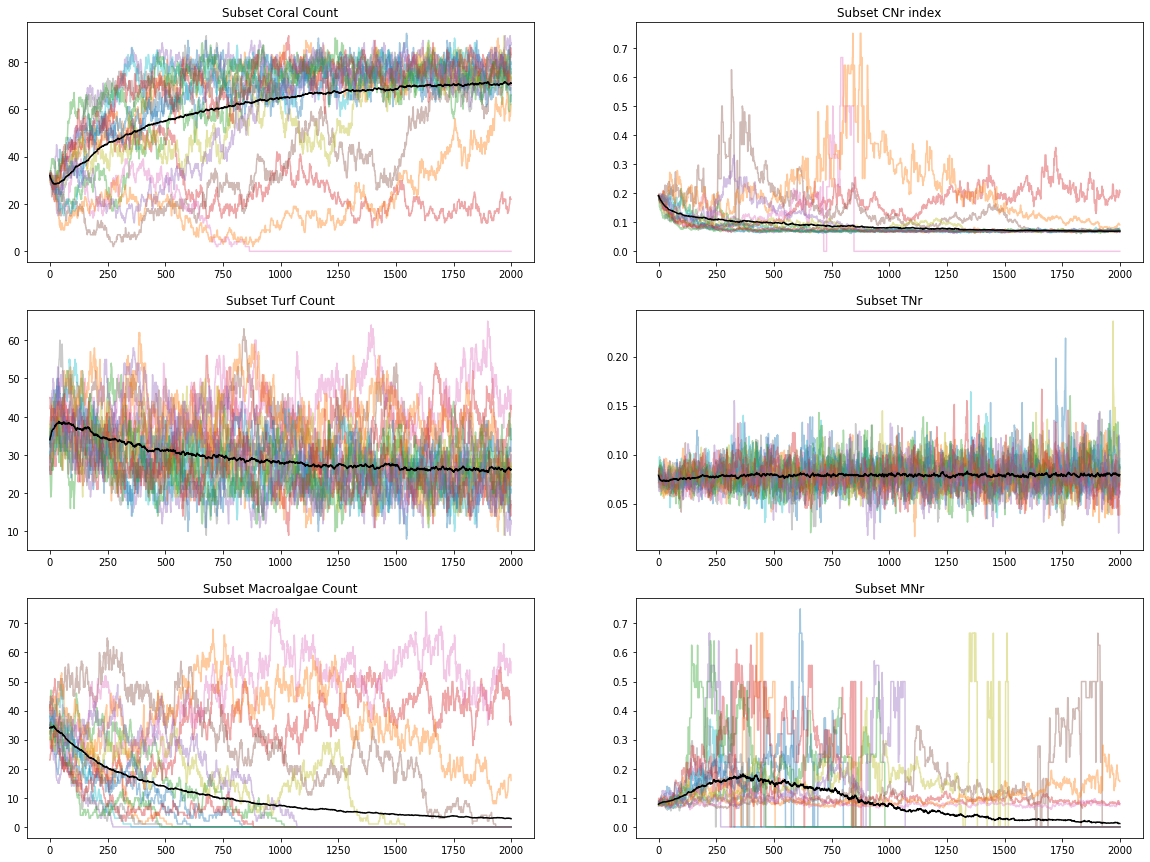

In [31]:
RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s)

<center> <h1> GRAZING = .7 </h1> </center>

In [32]:
## Parameters
threshold = 1.45                            
coralPercent = .33
algaePercent = .33
turfPercent = 1 - coralPercent - algaePercent
r=1.0
d=.4 #.2
a=.2
y=.75 #.9

g=.7
types7 = np.zeros((NumberOfTimesteps, NumberOfNodes, NumberOfSimulations)) ## make sure not to overwrite

In [33]:
%%time

Grazing7 = Ocean()

for s in range(0,NumberOfSimulations):
    HighGrazing = Reef()
    count = 0
    for i in range(0,rows):        
        for j in range(0,columns):
            U = np.random.choice([1,2],
                                 p=[.5, .5])
            if (i,j) in coralNodeLocations:
                U = 0
            node = Organism(type=U, location=[i,j], ID=count)
            HighGrazing.append(node)
            count = count + 1            
    HighGrazing.generateGraph(threshold)
    
    for n in range(0,NumberOfTimesteps):
        
        for i,val in enumerate(HighGrazing.nodes):
            types7[n,i,s] = HighGrazing.nodes[i].type
        HighGrazing.roll(r=r, d=d, a=a, g=g, y=y, dt=dt) 
        
    Grazing7.append(HighGrazing)

CPU times: user 10min 52s, sys: 1.3 s, total: 10min 53s
Wall time: 10min 55s


In [34]:
C,CN,CNr,T,TN,TNr,M,MN,MNr = genOut(grazesim=Grazing7)

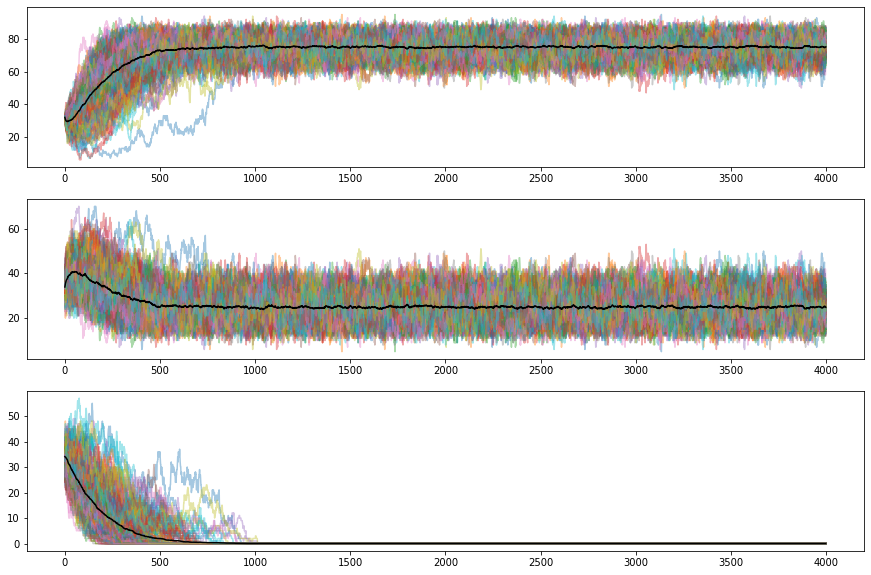

In [35]:
plt.figure(figsize=(15, 10))
plt.subplot(311)
plt.plot(x,C, alpha=0.4)
plt.plot(x,C.mean(axis=1), 'black')
plt.subplot(312)
plt.plot(x,T, alpha=0.4)
plt.plot(x,T.mean(axis=1), 'black')
plt.subplot(313)
plt.plot(x,M, alpha=0.4)
plt.plot(x,M.mean(axis=1), 'black')

<center> <h1> Count And Neighbor Average Plots - Coral, Turf, and Macroalgae </h1> </center>

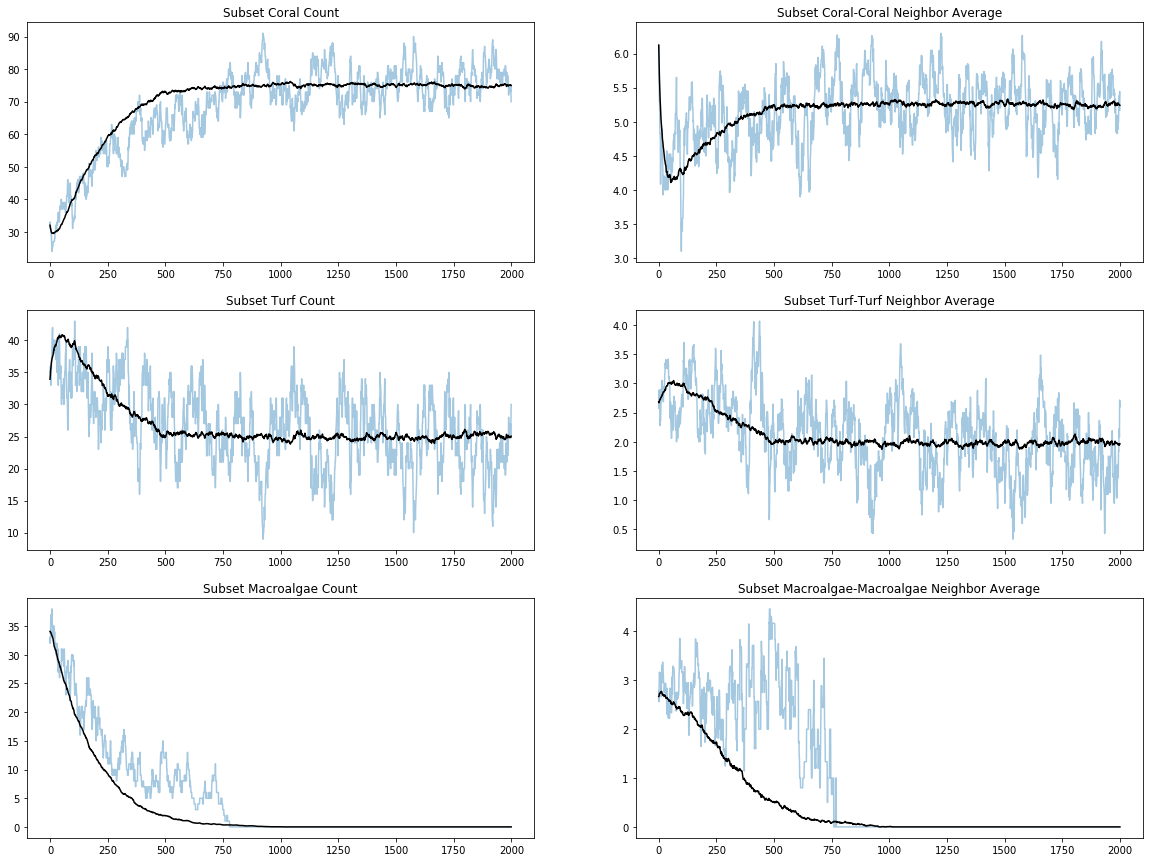

In [36]:
CountNeighborsPlots(x,C,CN,T,TN,M,MN,ti,tf,s)

<center> <h1> Count And CNr Plots - Coral, Turf, and Macroalgae </h1> </center>

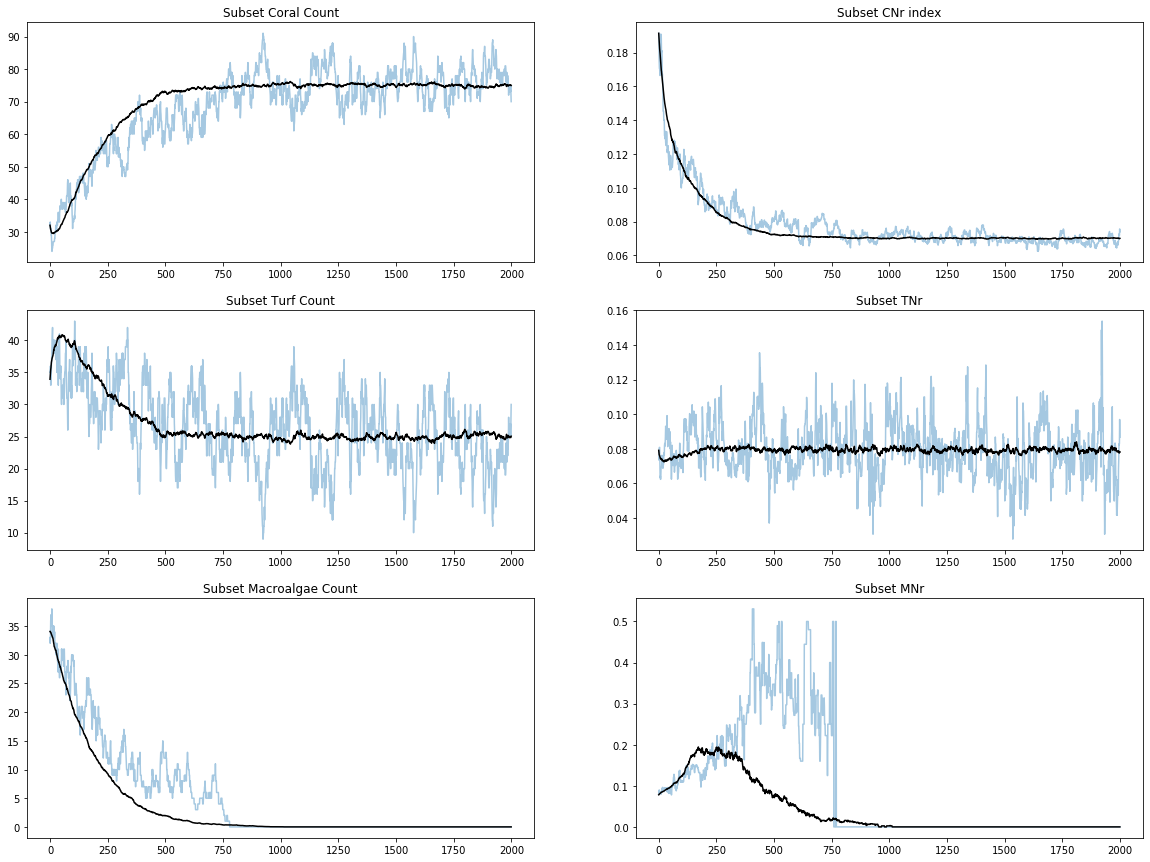

In [37]:
RCountNeighborsPlots(x,C,CNr,T,TNr,M,MNr,ti,tf,s)

In [38]:
C4,CN4,CNr4,T4,TN4,TNr4,M4,MN4,MNr4 = genOut(grazesim=Grazing4)

In [39]:
C5,CN5,CNr5,T5,TN5,TNr5,M5,MN5,MNr5 = genOut(grazesim=Grazing5)

In [40]:
C6,CN6,CNr6,T6,TN6,TNr6,M6,MN6,MNr6 = genOut(grazesim=Grazing6)

In [41]:
C7,CN7,CNr7,T7,TN7,TNr7,M7,MN7,MNr7 = genOut(grazesim=Grazing7)

In [77]:
import pandas as pd

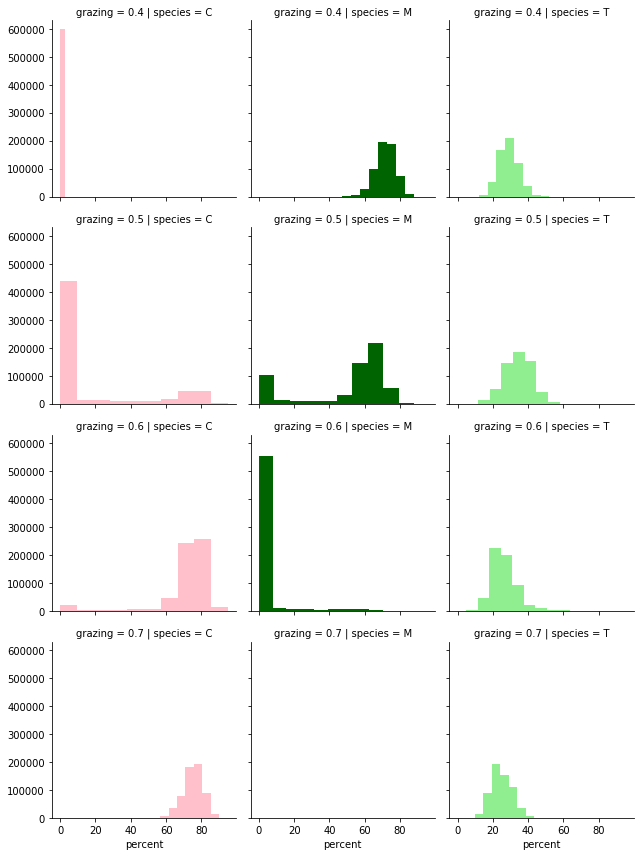

In [151]:
colors = ['pink','darkgreen','lightgreen']
g= sns.FacetGrid(data=subset,row='grazing',col='species', hue='species',palette=colors)
g.map(plt.hist, 'percent')

In [213]:
def matrixToDataFrame(matrix,grazing,species):    
    frame = pd.DataFrame(matrix,index=[np.arange(0,len(matrix))]).reset_index()
    frame = frame.melt(id_vars='level_0')
    frame.columns = ['timestep','simulation','percent']
    frame = frame[frame['timestep']>3000]
    frame = frame.groupby(['simulation']).mean().reset_index()
    frame['grazing'] = grazing
    frame['species'] = species
    frame['coralDominance'] = 0
    return(frame)

In [214]:
C4frame = matrixToDataFrame(C4,.4,'C')
C5frame = matrixToDataFrame(C5,.5,'C')
C6frame = matrixToDataFrame(C6,.6,'C')
C7frame = matrixToDataFrame(C7,.7,'C')
M4frame = matrixToDataFrame(M4,.4,'M')
M5frame = matrixToDataFrame(M5,.5,'M')
M6frame = matrixToDataFrame(M6,.6,'M')
M7frame = matrixToDataFrame(M7,.7,'M')
T4frame = matrixToDataFrame(T4,.4,'T')
T5frame = matrixToDataFrame(T5,.5,'T')
T6frame = matrixToDataFrame(T6,.6,'T')
T7frame = matrixToDataFrame(T7,.7,'T')

In [226]:
C4frame.loc[C4frame['percent']>M4frame['percent'],['coralDominance']] = 1
C5frame.loc[C5frame['percent']>M5frame['percent'],['coralDominance']] = 1
C6frame.loc[C6frame['percent']>M6frame['percent'],['coralDominance']] = 1
C7frame.loc[C7frame['percent']>M7frame['percent'],['coralDominance']] = 1
M4frame.loc[C4frame['percent']>M4frame['percent'],['coralDominance']] = 1
M5frame.loc[C5frame['percent']>M5frame['percent'],['coralDominance']] = 1
M6frame.loc[C6frame['percent']>M6frame['percent'],['coralDominance']] = 1
M7frame.loc[C7frame['percent']>M7frame['percent'],['coralDominance']] = 1
T4frame.loc[C4frame['percent']>M4frame['percent'],['coralDominance']] = 1
T5frame.loc[C5frame['percent']>M5frame['percent'],['coralDominance']] = 1
T6frame.loc[C6frame['percent']>M6frame['percent'],['coralDominance']] = 1
T7frame.loc[C7frame['percent']>M7frame['percent'],['coralDominance']] = 1

In [227]:
allSimulations = pd.concat([C4frame,C5frame,C6frame,C7frame,
                            M4frame,M5frame,M6frame,M7frame,
                            T4frame,T5frame,T6frame,T7frame])

In [229]:
allSimulations

simulation  timestep    percent  grazing species  coralDominance
0             0    3500.0   0.000000      0.4       C               0
1             1    3500.0   0.000000      0.4       C               0
2             2    3500.0   0.000000      0.4       C               0
3             3    3500.0   0.000000      0.4       C               0
4             4    3500.0   0.000000      0.4       C               0
..          ...       ...        ...      ...     ...             ...
195         195    3500.0  24.703704      0.7       T               1
196         196    3500.0  24.789790      0.7       T               1
197         197    3500.0  25.004004      0.7       T               1
198         198    3500.0  24.138138      0.7       T               1
199         199    3500.0  24.839840      0.7       T               1

[2400 rows x 6 columns]

In [245]:
allSimulations['coralDominance'].hist

<bound method hist_series of 0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: coralDominance, Length: 2400, dtype: int64>

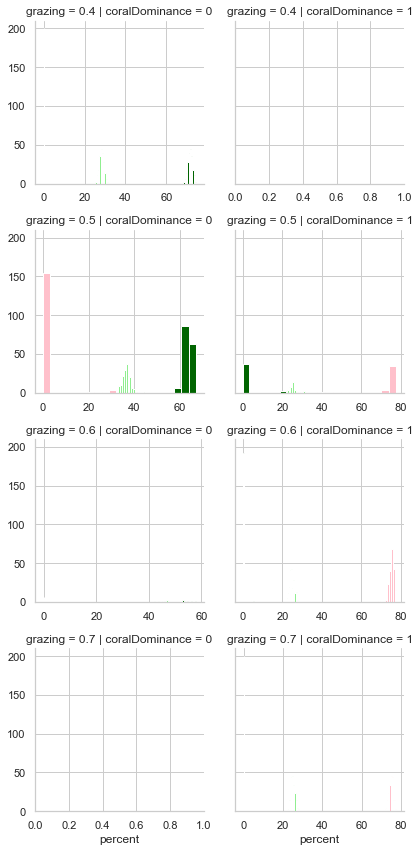

In [246]:
sns.set_style("whitegrid")
colors = ['pink','darkgreen','lightgreen']
g= sns.FacetGrid(data=allSimulations,row='grazing',col='coralDominance', hue='species',palette=colors,sharex=False)
g.map(plt.hist, 'percent')

In [230]:
coralDominant = allSimulations[allSimulations['coralDominance']==1]
algaeDominant = allSimulations[allSimulations['coralDominance']==0]

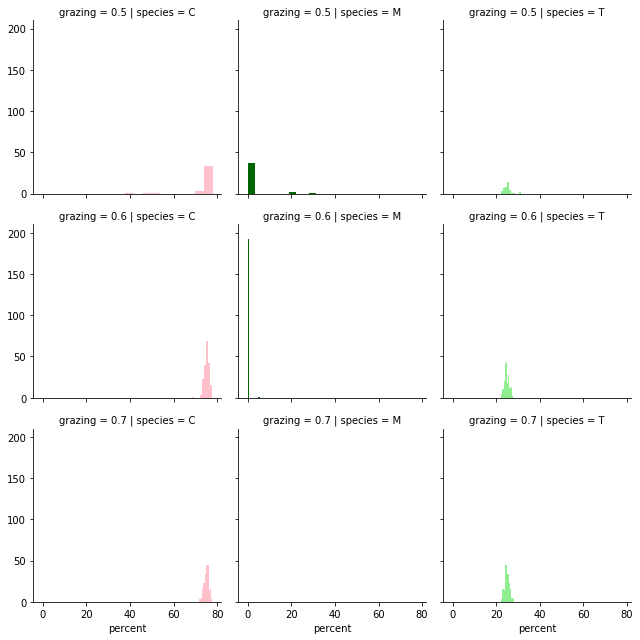

In [232]:
colors = ['pink','darkgreen','lightgreen']
g= sns.FacetGrid(data=coralDominant,row='grazing',col='species', hue='species',palette=colors)
g.map(plt.hist, 'percent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b81a9d7f0>,
      dtype=object)

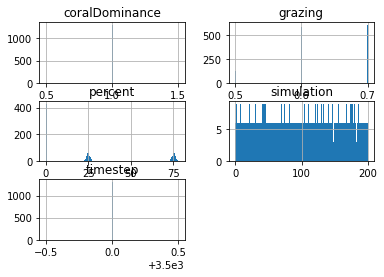

In [235]:
coralDominant.shape[]

(1299, 6)

In [123]:
import seaborn as sns

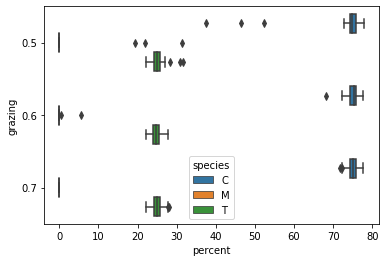

In [231]:
sns.boxplot(x='percent',y='grazing',hue='species',data=coralDominant,
            orient="h")